In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [4]:
tf.test.is_built_with_cuda()

True

In [5]:
print(tf.version.VERSION)

2.10.0


In [6]:
import sys
sys.version

'3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]'

In [7]:
from tensorflow.keras.layers import Input, Dropout, Conv2D, BatchNormalization, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16  import decode_predictions
from tensorflow.keras.applications.densenet  import Densenet121
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf

In [8]:
#setup
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os
import gc
import cv2
import math
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GroupShuffleSplit
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
sdir=r'C:\Users\umair\Desktop\PlantDiseases\train'
filepaths=[]
labels=[]
classlist=os.listdir(sdir)
for klass in classlist:
    classpath=os.path.join(sdir, klass)
    flist=os.listdir(classpath)
    for f in flist:
        fpath=os.path.join(classpath,f)
        filepaths.append(fpath)
        labels.append(klass)
Fseries=pd.Series(filepaths, name='filepaths')
Lseries=pd.Series(labels, name='labels')
df=pd.concat([Fseries, Lseries], axis=1)
balance=df['labels'].value_counts()
print (balance)
print (len(df))

Tomato___healthy                                 1927
Tomato___Leaf_Mold                               1882
Tomato___Target_Spot                             1827
Tomato___Spider_mites Two-spotted_spider_mite    1741
Name: labels, dtype: int64
7377


In [10]:
sdir=r'C:\Users\umair\Desktop\PlantDiseases\valid'
filepaths=[]
labels=[]
classlist=os.listdir(sdir)
for klass in classlist:
    classpath=os.path.join(sdir, klass)
    flist=os.listdir(classpath)
    for f in flist:
        fpath=os.path.join(classpath,f)
        filepaths.append(fpath)
        labels.append(klass)
Fseries=pd.Series(filepaths, name='filepaths')
Lseries=pd.Series(labels, name='labels')
df=pd.concat([Fseries, Lseries], axis=1)
balance=df['labels'].value_counts()
print (balance)
print (len(df))

Tomato___healthy                                 481
Tomato___Leaf_Mold                               470
Tomato___Target_Spot                             457
Tomato___Spider_mites Two-spotted_spider_mite    435
Name: labels, dtype: int64
1843


In [52]:
height=224
width=224
channels=3
batch_size=32
img_shape=(height, width, channels)
img_size=(height, width)

gen=ImageDataGenerator(rescale=1/255., horizontal_flip=True, rotation_range= 30, fill_mode='nearest', validation_split= 0.15)
gen2=ImageDataGenerator(rescale=1/255., fill_mode='nearest')
train_gen=gen.flow_from_directory("C:/Users/umair/Desktop/PlantDiseases/train", target_size=img_size,class_mode='categorical', 
                                  shuffle=True,batch_size=batch_size, subset="training")
valid_gen=gen.flow_from_directory("C:/Users/umair/Desktop/PlantDiseases/train", target_size=img_size,class_mode='categorical', 
                                  shuffle=True,batch_size=batch_size, subset="validation")

test_gen=gen2.flow_from_directory("C:/Users/umair/Desktop/PlantDiseases/valid", target_size=img_size, class_mode='categorical',shuffle=True,batch_size=batch_size)

Found 6271 images belonging to 4 classes.
Found 1106 images belonging to 4 classes.
Found 1844 images belonging to 5 classes.


In [53]:
def show_image_samples(gen):
    class_dict=gen.class_indices
    class_names=list( class_dict.keys())       
    images,labels=next(gen) # get a sample batch from the generator   
    plt.figure(figsize=(10, 10))
    length=len(labels)
 
    for i in range(5):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        index=np.argmax(labels[i])
        class_name=class_names[index]
        plt.title(class_name, color='black', fontsize=16)
        plt.axis('off')
    plt.show()
plt. style. use('default')

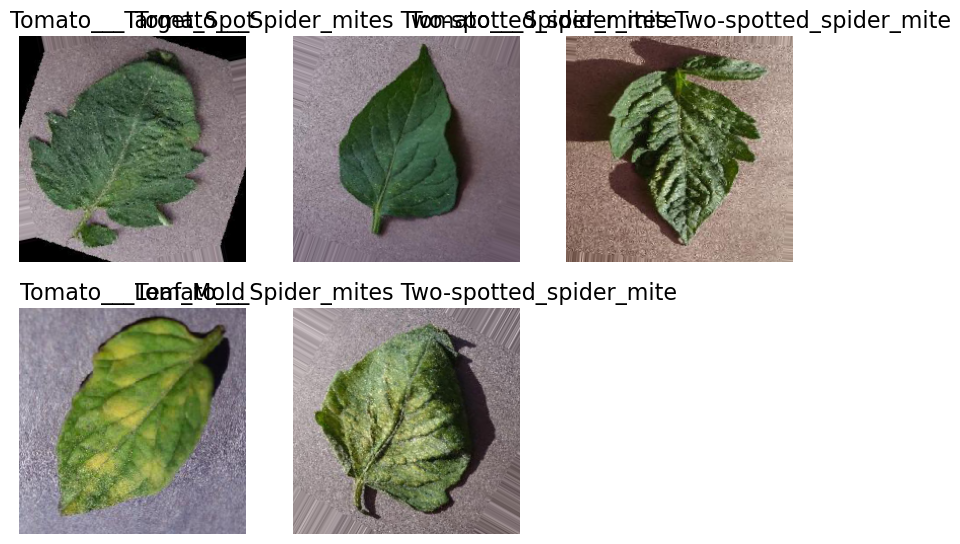

In [54]:
show_image_samples(train_gen)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, BatchNormalization
from tensorflow.keras.optimizers import Adam,RMSprop,Ftrl
# Maxpooling2D can also be used 
from tensorflow.keras.layers import GlobalAveragePooling2D, AveragePooling2D, MaxPooling2D

In [25]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Embedding, Conv1D, GlobalMaxPooling1D, Flatten, Dropout, Input, Lambda, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
baseModel = Densenet121(weights= 'imagenet', include_top = False, input_shape=(224, 224, 3))
#baseModel.trainable=False
for layer in baseModel.layers[:-3]:
      layer.trainable = False

headModel = baseModel.output
#headModel = GlobalAveragePooling2D()(headModel)
headModel = Flatten()(headModel)

headModel = Dense(128, activation="relu")(headModel)

headModel = Dense(128, activation="relu")(headModel)

headModel = Dense(4, activation="softmax")(headModel)
model = Model(inputs=baseModel.input, outputs=headModel)
optimizers = RMSProp(learning_rate=  0.001)
model.compile(loss = 'categorical_crossentropy', optimizer = optimizers, metrics = ['accuracy'])

In [27]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [30]:
#FIT MODEL
result1=model.fit_generator(train_gen,     epochs= 400,           validation_data = valid_gen, shuffle=True)

C:\Users\umair\AppData\Local\Temp\ipykernel_13208\2891752330.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  result1=model.fit_generator(train_gen,     epochs= 400,           validation_data = valid_gen, shuffle=True)


Epoch 1/400
196/196 [==============================] - 98s 499ms/step - loss: 0.2306 - accuracy: 0.9126 - val_loss: 0.2289 - val_accuracy: 0.9060
Epoch 2/400
196/196 [==============================] - 86s 441ms/step - loss: 0.1782 - accuracy: 0.9321 - val_loss: 0.1817 - val_accuracy: 0.9304
Epoch 3/400
196/196 [==============================] - 85s 434ms/step - loss: 0.1407 - accuracy: 0.9450 - val_loss: 0.2493 - val_accuracy: 0.9123
Epoch 4/400
196/196 [==============================] - 84s 426ms/step - loss: 0.1364 - accuracy: 0.9504 - val_loss: 0.1938 - val_accuracy: 0.9349
Epoch 5/400
196/196 [==============================] - 84s 429ms/step - loss: 0.1170 - accuracy: 0.9565 - val_loss: 0.4569 - val_accuracy: 0.8409
Epoch 6/400
196/196 [==============================] - 84s 431ms/step - loss: 0.1126 - accuracy: 0.9573 - val_loss: 0.2405 - val_accuracy: 0.9268
Epoch 7/400
196/196 [==============================] - 85s 433ms/step - loss: 0.1023 - accuracy: 0.9624 - val_loss: 0.1987 -

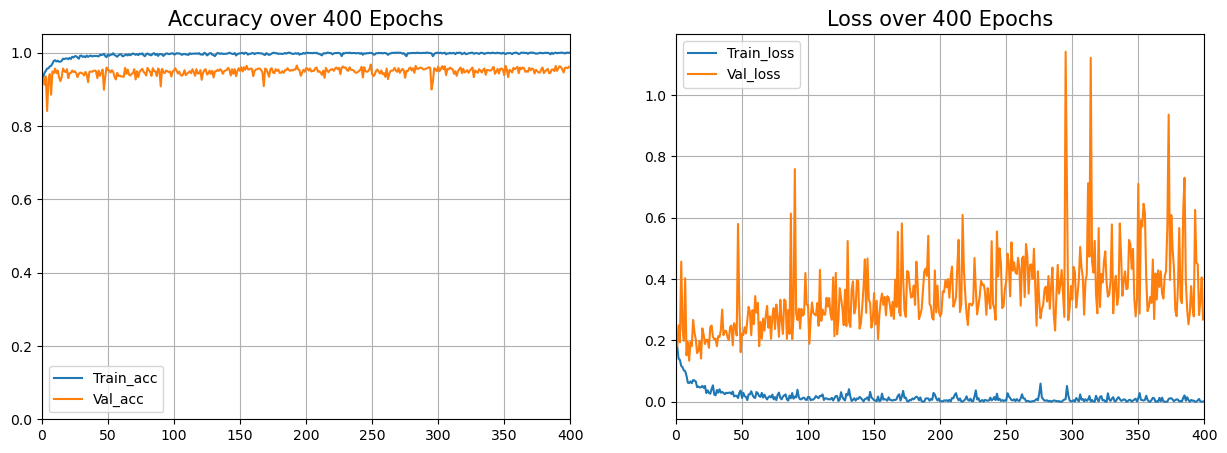

In [31]:
#Plot the accuracy and loss graphs
import matplotlib.pyplot as plt
def plot_acc_loss(result, epochs):
    acc = result.history['accuracy']
    loss = result.history['loss']
    val_acc = result.history['val_accuracy']
    val_loss = result.history['val_loss']
    plt.figure(figsize=(15, 5))
    plt.subplot(121)
    plt.xlim(0,epochs)
    plt.ylim(0, 1.05)
    plt.plot(range(1,epochs), acc[1:], label='Train_acc')
    plt.plot(range(1,epochs), val_acc[1:], label='Val_acc')
    plt.title('Accuracy over ' + str(epochs) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.subplot(122)
    plt.xlim(0,epochs)
    #plt.ylim(0, 1.4)
    plt.plot(range(1,epochs), loss[1:], label='Train_loss')
    plt.plot(range(1,epochs), val_loss[1:], label='Val_loss')
    plt.title('Loss over ' + str(epochs) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.show()
    
plot_acc_loss(result1, 400)

In [32]:
model.save("C:/Users/umair/Desktop/PlantDiseases/VGG16model.hdf5")

In [ ]:

gen=ImageDataGenerator(rescale=1/255., horizontal_flip=True, rotation_range= 30, fill_mode='nearest', validation_split= 0.15)
gen2=ImageDataGenerator(rescale=1/255., fill_mode='nearest')
train_gen=gen.flow_from_directory("C:/Users/umair/Desktop/PlantDiseases/train", target_size=img_size,class_mode='categorical', 
                                  shuffle=True,batch_size=batch_size, subset="training")
valid_gen=gen.flow_from_directory("C:/Users/umair/Desktop/PlantDiseases/train", target_size=img_size,class_mode='categorical', 
                                  shuffle=True,batch_size=batch_size, subset="validation")

test_gen=gen2.flow_from_directory("C:/Users/umair/Desktop/PlantDiseases/valid", target_size=img_size, class_mode='categorical',shuffle=True,batch_size=batch_size)

In [38]:
test_gen.reset()  
x = model.evaluate(test_gen,
                           steps = np.ceil(len(test_gen)), 
                           use_multiprocessing = False,  verbose = 1,
                           workers=1     )

print('Test loss:' , x[0])
print('Test accuracy:',x[1])

58/58 [==============================] - 5s 87ms/step - loss: 0.4831 - accuracy: 0.9729
Test loss: 0.48313841223716736
Test accuracy: 0.9728703498840332


58/58 [==============================] - 5s 84ms/step
[[114 113 118 125]
 [104  88 130 113]
 [109 123  98 127]
 [130 107 125 119]]
              precision    recall  f1-score   support

           0       0.25      0.24      0.25       470
           1       0.20      0.20      0.20       435
           2       0.21      0.21      0.21       457
           3       0.25      0.25      0.25       481

    accuracy                           0.23      1843
   macro avg       0.23      0.23      0.23      1843
weighted avg       0.23      0.23      0.23      1843



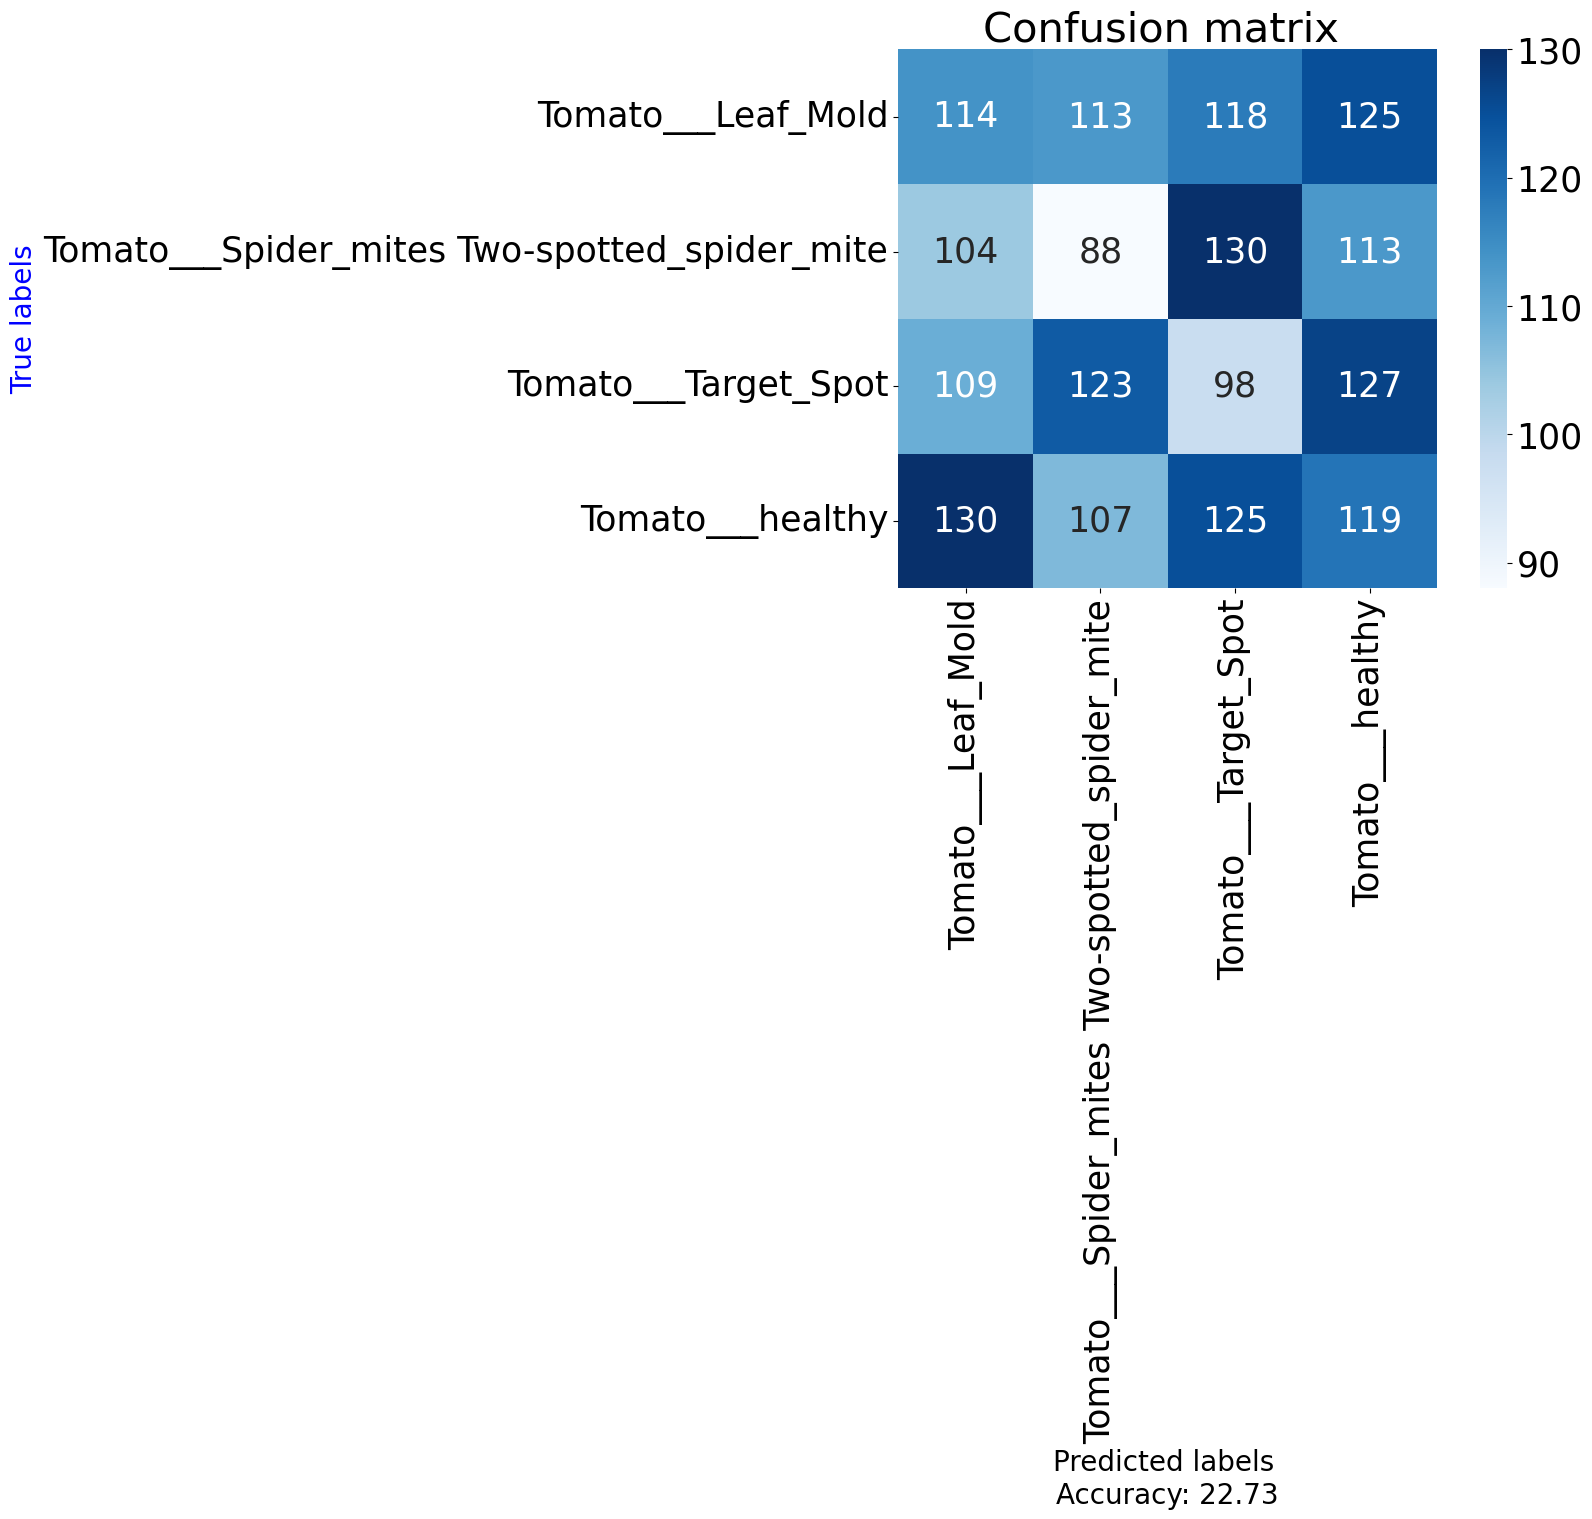

In [39]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix
filenames = test_gen.filenames
nb_samples = len(filenames)
predict = model.predict(test_gen,steps = np.ceil(len(test_gen)))
pp=predict
predict=np.argmax(predict, axis=-1)
classes= test_gen.classes[test_gen.index_array]
acc=sum(predict==classes)/len(predict)
names=test_gen.class_indices
cm = confusion_matrix(classes, predict)
print(cm)
print(classification_report(classes,predict))
import seaborn as sns
plt.figure(figsize=(11,7))
x_axis_labels = test_gen.class_indices
y_axis_labels = test_gen.class_indices
plt.rcParams.update({'font.size': 25})
sns.heatmap(confusion_matrix(classes, predict),xticklabels=x_axis_labels,
            yticklabels=y_axis_labels,annot= True, fmt='',cmap = 'Blues')
plt.imshow(cm, cmap='binary' )
plt.xlabel('Predicted labels \nAccuracy: {:0.2f}'.format(acc*100),fontsize=20)
plt.ylabel("True labels",fontsize=20,color='b')
plt.title('Confusion matrix ')
plt.show()

In [48]:
test_gen.class_indices

{'Tomato___Leaf_Mold': 0,
 'Tomato___Spider_mites Two-spotted_spider_mite': 1,
 'Tomato___Target_Spot': 2,
 'Tomato___healthy': 3}

1/1 [==============================] - 0s 29ms/step
Tomato___Target_Spot (1.0)
Tomato___Spider_mites Two-spotted_spider_mite (3.82e-06)


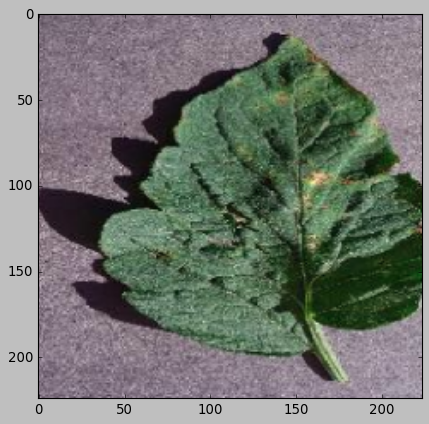

In [47]:
img = image.load_img('Desktop/healthy.PNG',target_size=(img_shape))
img = image.img_to_array(img)
img = img/255.

classes = list(train_gen.class_indices)
proba = model.predict(img.reshape(1,224,224,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(2):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)
plt.style.use('classic')

1/1 [==============================] - 0s 48ms/step
Tomato___Spider_mites Two-spotted_spider_mite (1.0)
Tomato___Target_Spot (2.1e-19)


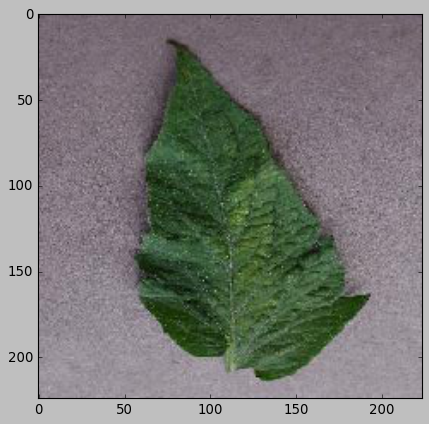

In [41]:
img = image.load_img('Desktop/PlantDiseases/valid/Tomato___Spider_mites Two-spotted_spider_mite/00bc7858-1dca-4bfb-a828-225f03bd72a5___Com.G_SpM_FL 9455.JPG',target_size=(img_shape))
img = image.img_to_array(img)
img = img/255.

classes = list(train_gen.class_indices)
proba = model.predict(img.reshape(1,224,224,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(2):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)
plt.style.use('classic')